# Exploratory Data Analysis in Pandas

## Data Pre Processing

### Install and Import package
#### If don't have the package already, please install first
#### how to install: !pip install pandas
#### how to import: Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### In this section we will explore the dataset

#### Read the data and look at the first 5 rows using the head method. There are two datasets, including coffee and coffe cost dataset

In [2]:
## Read dataset1
coffee = pd.read_csv("coffee.csv")
coffee.head()

,Profit,Margin,Sales,Inventory,Budget.Profit,Budget.COGS,Budget.Margin,Budget.Sales,Area.Code,ProductId,DateTableau,recordID
0,94,130,219,777,100,90,130,220,719,1,01/01/2010,16001
1,68,107,190,623,80,80,110,190,970,2,01/01/2010,16002
2,101,139,234,821,110,100,140,240,970,3,01/01/2010,16003
3,30,56,100,623,30,30,50,80,303,13,01/01/2010,16004
4,54,80,134,456,70,60,90,150,303,5,01/01/2010,16005


In [3]:
## Read dataset2
coffee_cost = pd.read_csv("coffee_cost.csv")
coffee_cost.head()

,COGS,Total.Expenses,Marketing,recordID
0,65,42,20,17653
1,56,40,17,16352
2,120,57,37,19467
3,86,33,24,18847
4,36,22,10,17007


In [4]:
## Merge two datasets together using smae column "recordID"
coffee_merged = coffee.merge(coffee_cost, how = "inner", on="recordID")
coffee_merged

,Profit,Margin,Sales,Inventory,Budget.Profit,Budget.COGS,Budget.Margin,Budget.Sales,Area.Code,ProductId,DateTableau,recordID,COGS,Total.Expenses,Marketing
0,94,130,219,777,100,90,130,220,719,1,01/01/2010,16001,89,36,24
1,68,107,190,623,80,80,110,190,970,2,01/01/2010,16002,83,39,27
2,30,56,100,623,30,30,50,80,303,13,01/01/2010,16004,44,26,14
3,54,80,134,456,70,60,90,150,303,5,01/01/2010,16005,54,26,15
4,53,108,180,558,80,80,130,210,720,6,01/01/2010,16006,72,55,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-4,76,140,627,-10,40,50,90,509,13,12/01/2011,20241,55,79,49
2996,156,174,308,1166,110,100,160,260,253,8,12/01/2011,20242,115,69,37
2997,19,32,60,567,20,20,30,50,206,4,12/01/2011,20244,24,19,7
2998,86,104,188,461,80,80,120,200,360,2,12/01/2011,20247,72,46,23


### Data Summary

In [5]:
coffee_merged.shape

(3000, 15)

#### By using .shape, we can tell that there are 3000 rows and 15 columns

#### Method describe shows the main statistical characteristics of the dataset for each numerical feature (for this dataset only contain int64): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles

In [6]:
coffee_merged.describe()

,Profit,Margin,Sales,Inventory,Budget.Profit,Budget.COGS,Budget.Margin,Budget.Sales,Area.Code,ProductId,recordID,COGS,Total.Expenses,Marketing
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,61.412000,104.187667,193.112667,748.489333,61.080000,75.086667,100.706667,175.793333,582.767667,6.823667,18128.964667,84.555667,53.826667,30.913667
std,101.210491,94.774525,152.137339,681.160791,80.177988,67.001161,93.488398,150.506438,221.818355,3.662473,1226.132318,67.618284,32.277906,26.826954
min,-638.000000,-302.000000,17.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,203.000000,1.000000,16001.000000,0.000000,10.000000,0.000000
25%,17.000000,52.000000,100.000000,424.000000,20.000000,30.000000,50.000000,80.000000,418.500000,3.000000,17065.750000,43.000000,33.000000,13.000000
50%,41.000000,76.000000,137.000000,621.000000,40.000000,50.000000,70.000000,130.000000,573.000000,6.000000,18127.500000,60.000000,46.000000,22.000000
75%,93.000000,132.000000,230.000000,898.000000,80.000000,90.000000,130.000000,210.000000,773.000000,10.000000,19189.250000,99.250000,65.000000,39.000000
max,777.000000,613.000000,912.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,985.000000,13.000000,20248.000000,364.000000,189.000000,156.000000


#### The dataset don't have any missing values, so there is no need to fill the gap.
#### The dataset contains 1 object and 14 int64 features

In [7]:
coffee_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profit          3000 non-null   int64 
 1   Margin          3000 non-null   int64 
 2   Sales           3000 non-null   int64 
 3   Inventory       3000 non-null   int64 
 4   Budget.Profit   3000 non-null   int64 
 5   Budget.COGS     3000 non-null   int64 
 6   Budget.Margin   3000 non-null   int64 
 7   Budget.Sales    3000 non-null   int64 
 8   Area.Code       3000 non-null   int64 
 9   ProductId       3000 non-null   int64 
 10  DateTableau     3000 non-null   object
 11  recordID        3000 non-null   int64 
 12  COGS            3000 non-null   int64 
 13  Total.Expenses  3000 non-null   int64 
 14  Marketing       3000 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 375.0+ KB


### Handling Missing Data

#### Double check if there are any missing data

In [8]:
coffee_merged.isna().sum()

Profit            0
Margin            0
Sales             0
Inventory         0
Budget.Profit     0
Budget.COGS       0
Budget.Margin     0
Budget.Sales      0
Area.Code         0
ProductId         0
DateTableau       0
recordID          0
COGS              0
Total.Expenses    0
Marketing         0
dtype: int64

### Data Visualization

#### Since this dataset contains multiple numerical data, we could take a look about distribution by using histogram

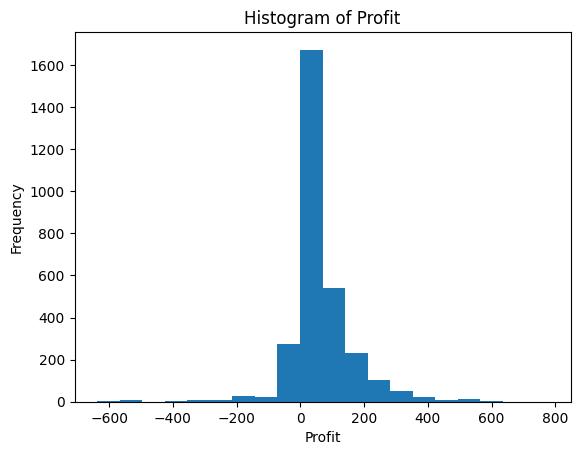

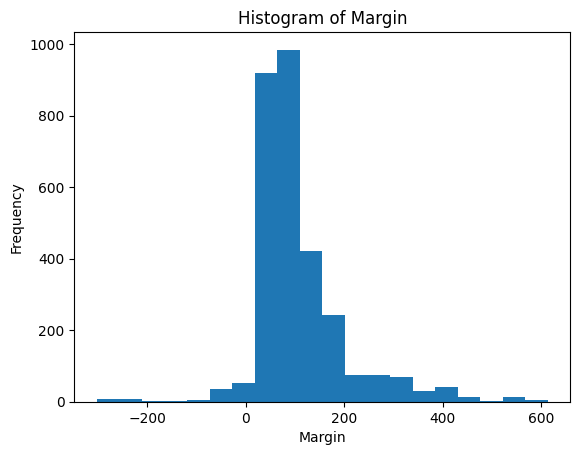

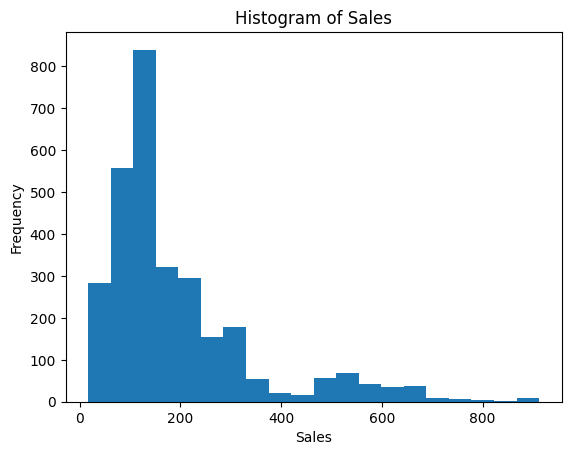

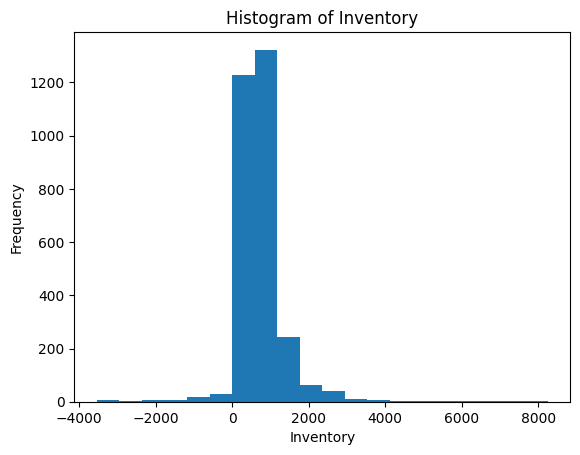

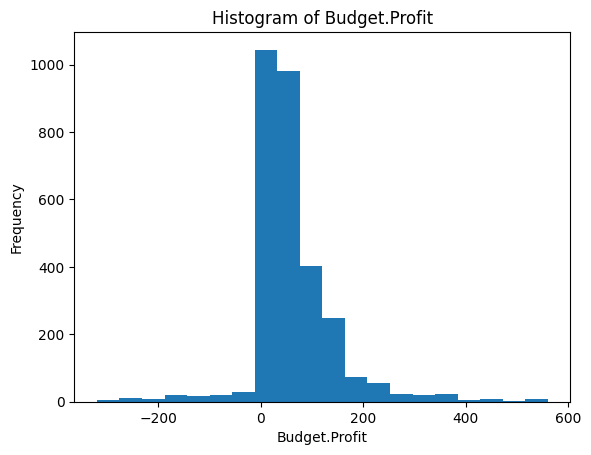

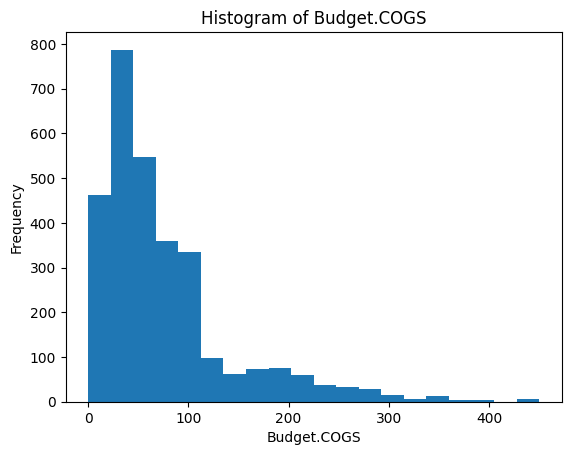

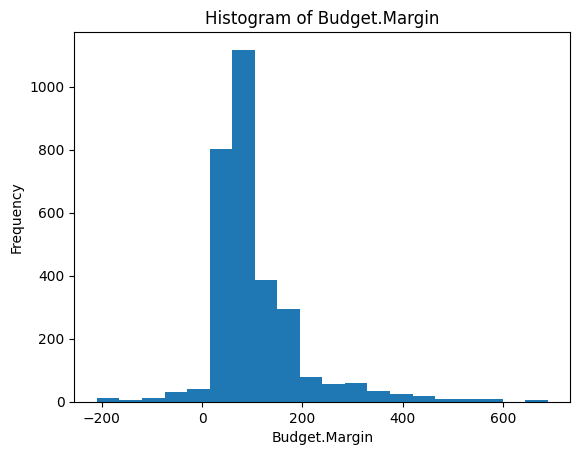

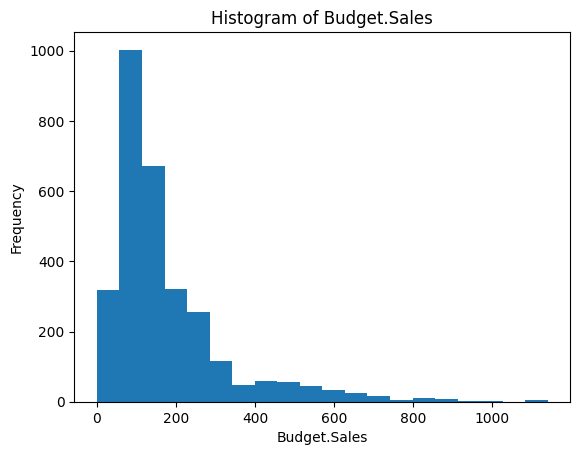

In [9]:
## Distribution of numeric columns
numeric_cols = ['Profit', 'Margin', 'Sales', 'Inventory', 'Budget.Profit', 'Budget.COGS', 'Budget.Margin', 'Budget.Sales']
for col in numeric_cols:
    plt.hist(coffee_merged[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

#### Based on the histogram, we can tell that profit, margin and inventory is similar to normal distribution. 
#### While others features are all skewed distribution.

### Find out if there is any correlation between features using pairplot and corr()

/home/jessica/.pyenv/versions/pred/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


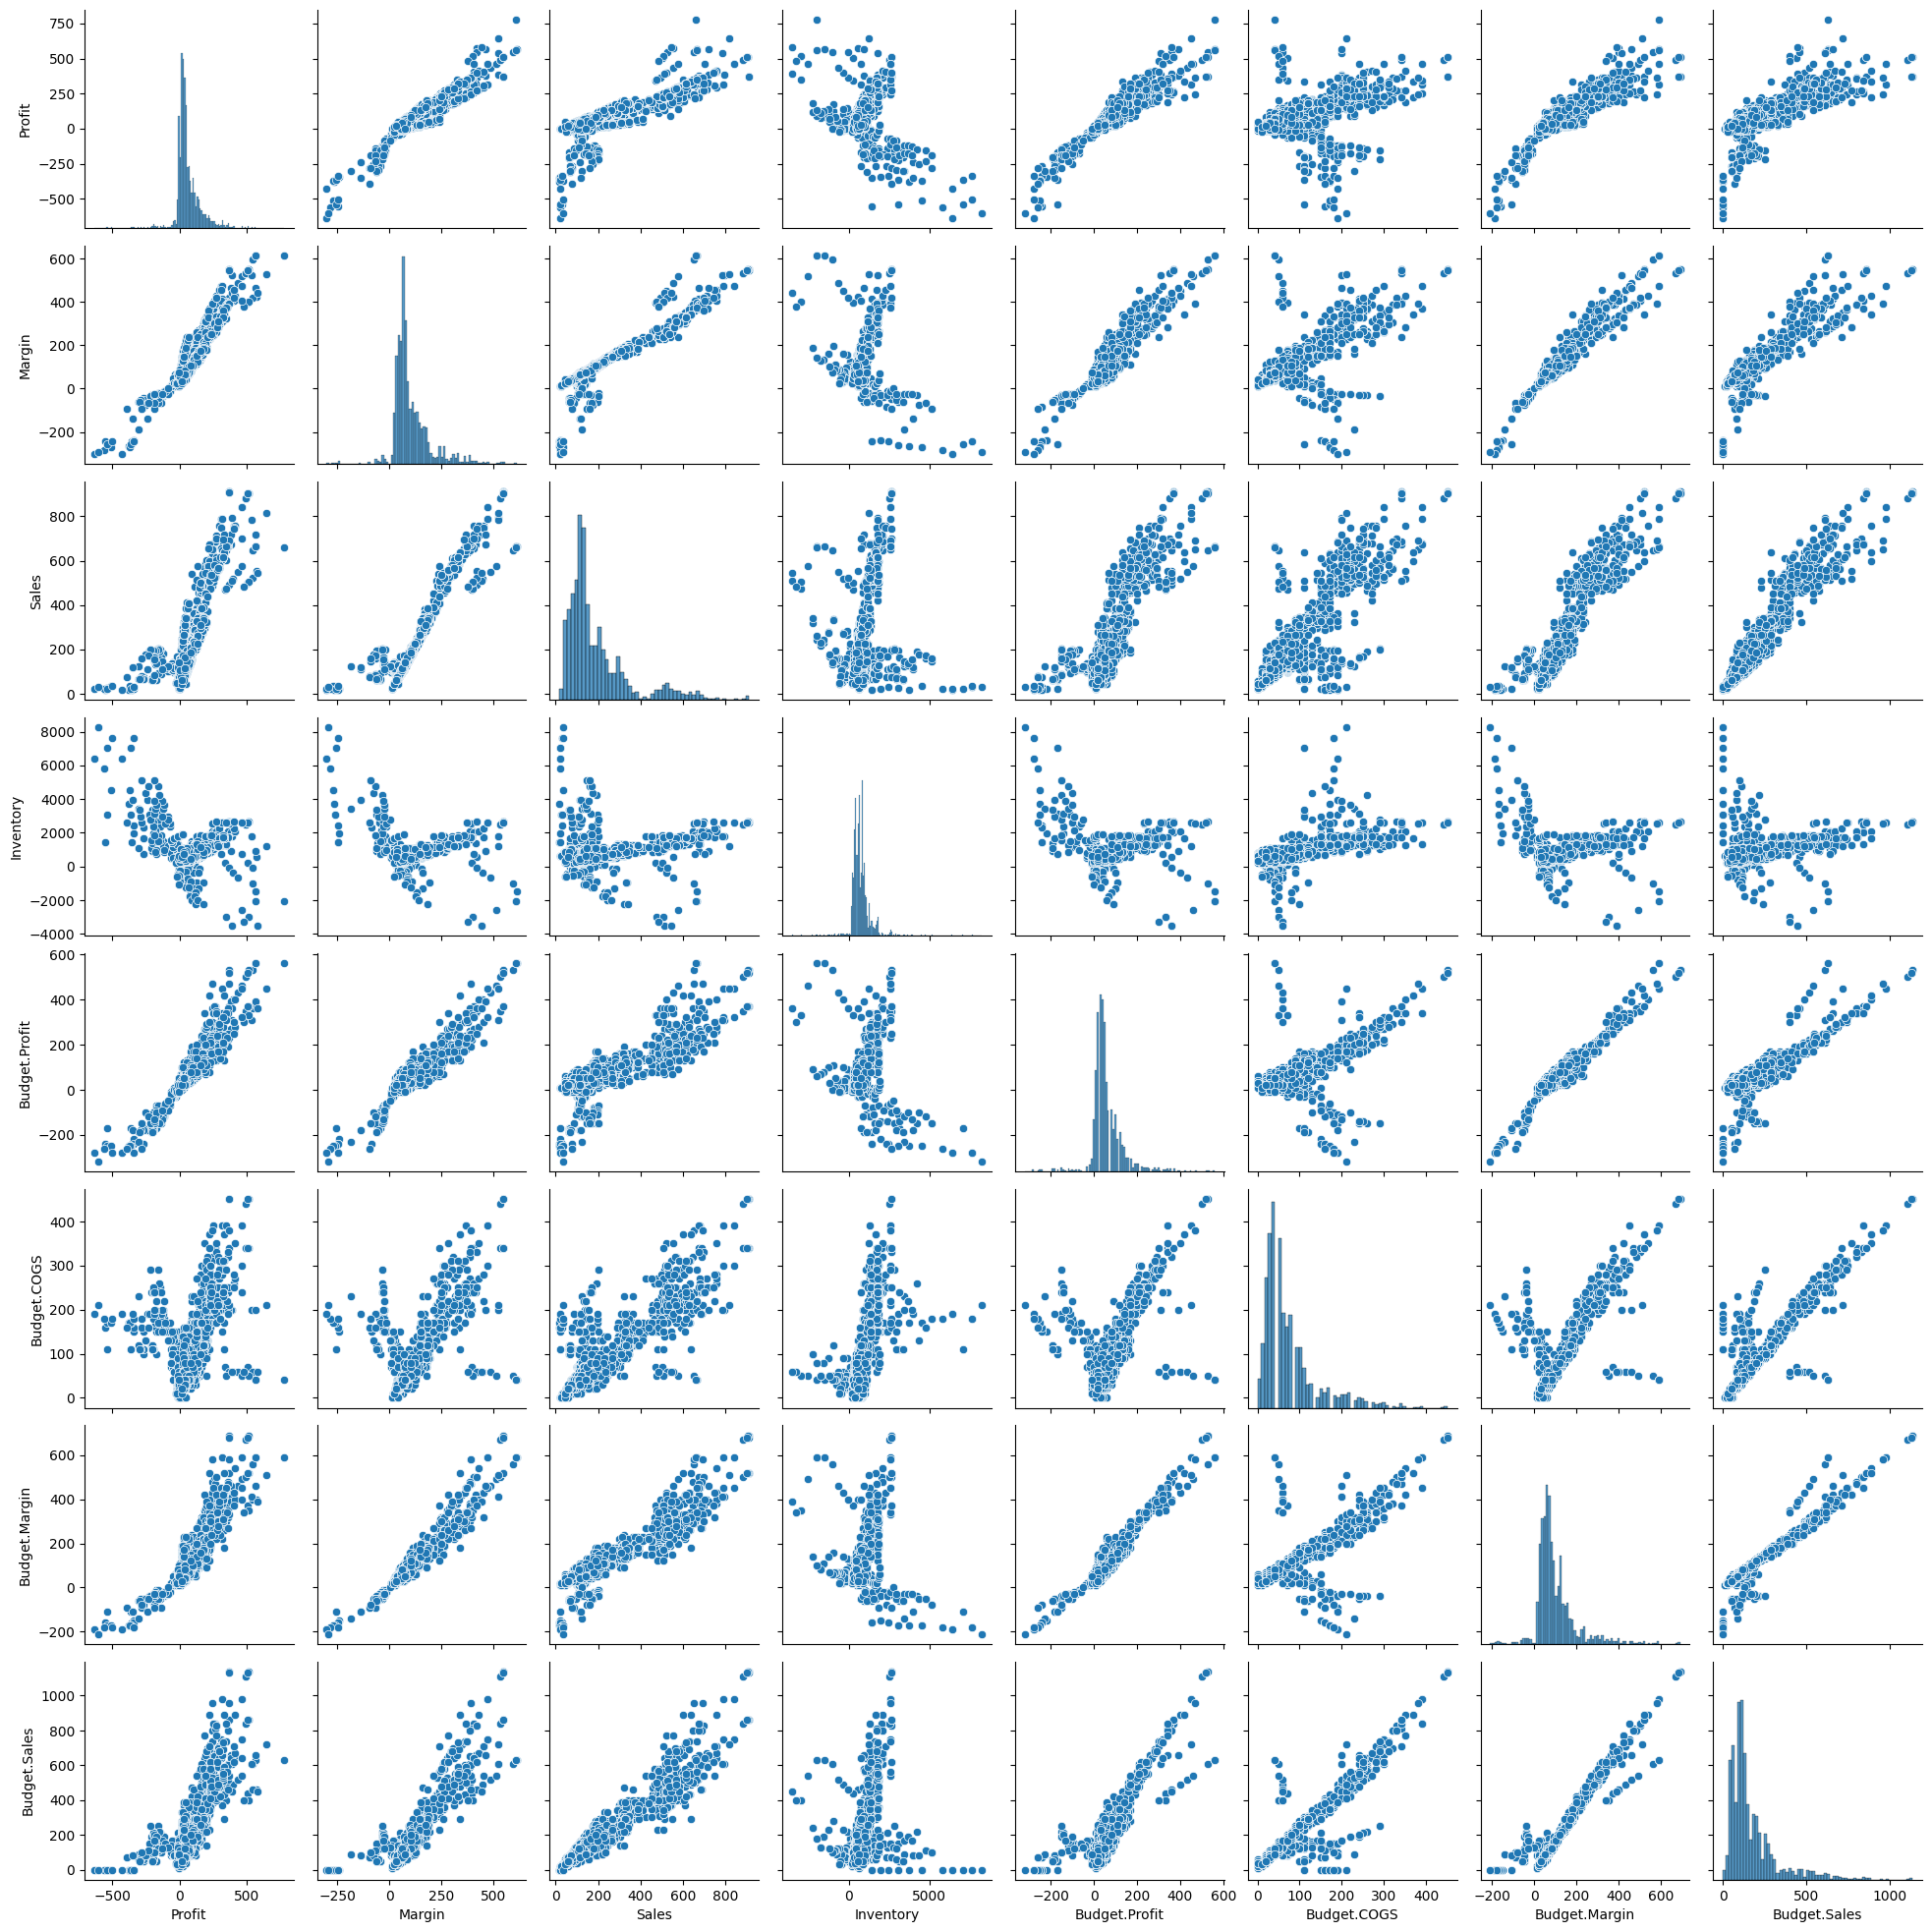

In [10]:
## Pairplot to visualize relationships between numeric variables
sns.pairplot(coffee_merged[numeric_cols])
plt.show()

#### Using heatmap to see sepcific correlation number between features
#### Based on the result, we could tell that most feature are correlated except inventory since those features are related to profit/margin/sales.

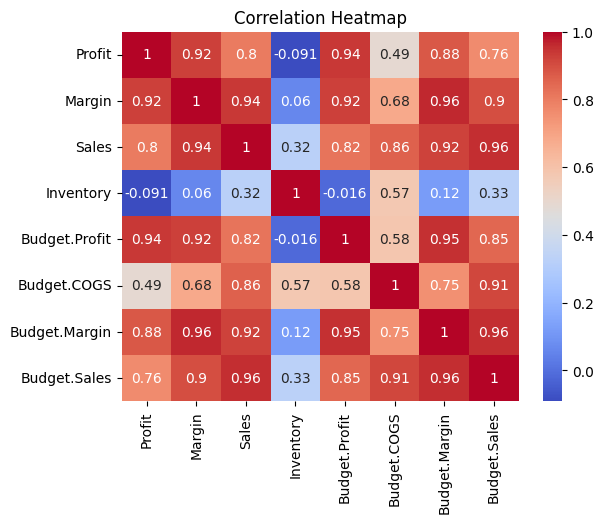

In [11]:
correlation_matrix = coffee_merged[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Exploratoy Analysis

### Total Sales by month

In [12]:
# Convert the DateTableau column to a datetime format
coffee_merged["DateTableau"] = pd.to_datetime(coffee_merged["DateTableau"])

# Extract the month from the DateTableau column and create a new column
coffee_merged["Month"] = coffee_merged["DateTableau"].dt.month

# Group the data by Month and Sales to calculate the total sales
monthly_product_count = coffee_merged[["Sales", "Month"]].groupby(["Month"]).sum()
monthly_product_count

,Sales
Month,
1,48167
2,44191
3,47630
4,47448
5,46538
6,49116
7,48208
8,52346
9,50313


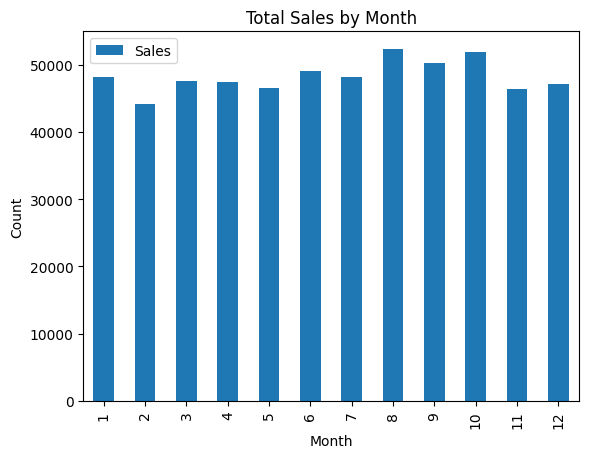

In [13]:
# Plot a bar chart to compare total sales by month
monthly_product_count.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Sales by Month')
plt.show()

### The top 5 product (by total sales) sales by month

In [14]:
# Group the data b Productid, Month and calculate the sum of sales and profit
product_monthly_summary = coffee_merged.groupby(['ProductId', 'Month']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
product_monthly_summary

,ProductId,Month,Sales,Profit
0,1,1,1497,304
1,1,2,1381,270
2,1,3,1377,234
3,1,4,1733,240
4,1,5,1589,422
...,...,...,...,...
151,13,8,1553,-43
152,13,9,2150,-232
153,13,10,2674,64
154,13,11,1982,-224


In [15]:
# Calculate the total sales for each product
product_total = coffee_merged.groupby("ProductId")["Sales"].sum().reset_index()
product_total

,ProductId,Sales
0,1,18896
1,2,94753
2,3,46893
3,4,26467
4,5,60113
5,6,53483
6,7,15323
7,8,51798
8,9,69106
9,10,24902


In [16]:
# Sort the products by total sales in descending order and get the top 5 products
top_5 = product_total.nlargest(5, "Sales")
top_5

,ProductId,Sales
1,2,94753
8,9,69106
4,5,60113
5,6,53483
7,8,51798


In [17]:
# Filter the product_monthly_summary for the top 5 products
top5_summary = product_monthly_summary[product_monthly_summary["ProductId"].isin(top_5["ProductId"])]
top5_summary

,ProductId,Month,Sales,Profit
12,2,1,5862,2550
13,2,2,8479,3698
14,2,3,8045,3611
15,2,4,7117,3061
16,2,5,6516,2463
17,2,6,6936,3152
18,2,7,10039,4417
19,2,8,10596,5012
20,2,9,8360,3478
21,2,10,8761,3787


In [18]:
# Create a pivot table to prepare data for plotting
pivot_table = top5_summary.pivot(index="Month", columns = "ProductId", values="Sales")
pivot_table

ProductId,2,5,6,8,9
Month,,,,,
1,5862,4346,4660,4835,5940
2,8479,5278,4115,4241,4361
3,8045,5291,5357,3900,5664
4,7117,5269,4985,3911,5432
5,6516,4874,5077,5234,5381
6,6936,5014,4066,4439,6563
7,10039,4406,3515,4928,4246
8,10596,6108,3104,4979,6205
9,8360,6449,5041,3333,6673


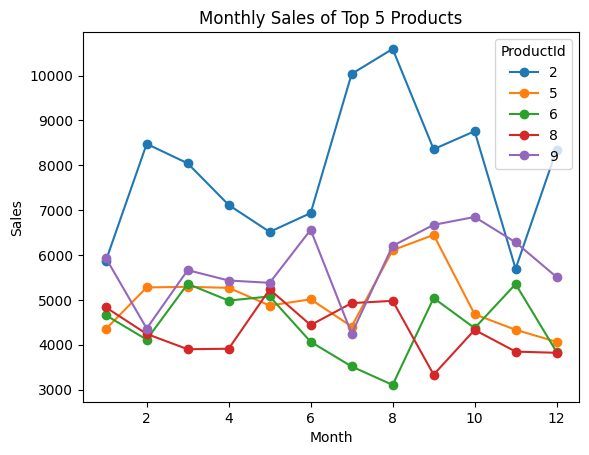

In [19]:
# Plot a line chart to compare the monthly sales of the top 5 products
pivot_table.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales of Top 5 Products')
plt.show()

### Profit Margin Analysis:
### Calculate the average profit margin for each product and visualize it.
### Identify products with the highest and lowest profit margins.

Highest Profit Margin Product (Product ID 7.0): 170.65
Lowest Profit Margin Product (Product ID 13.0): 42.04


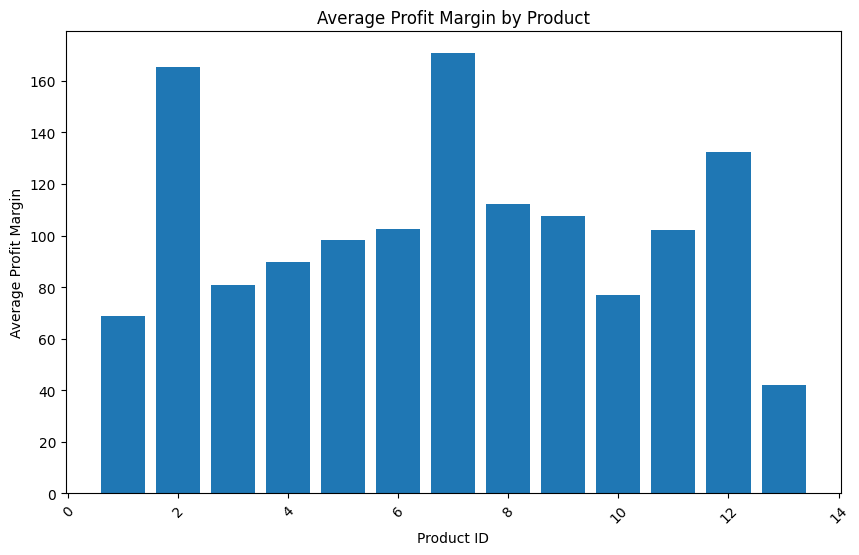

In [20]:
# Calculate the average profit margin for each product
average_profit_margin = coffee_merged.groupby('ProductId')['Margin'].mean().reset_index()

# Sort the products by average profit margin in descending order
average_profit_margin_sorted = average_profit_margin.sort_values(by='Margin', ascending=False)

# Identify products with the highest and lowest profit margins
highest_profit_margin_product = average_profit_margin_sorted.iloc[0]
lowest_profit_margin_product = average_profit_margin_sorted.iloc[-1]

# Print the products with the highest and lowest profit margins
print(f"Highest Profit Margin Product (Product ID {highest_profit_margin_product['ProductId']}): {highest_profit_margin_product['Margin']:.2f}")
print(f"Lowest Profit Margin Product (Product ID {lowest_profit_margin_product['ProductId']}): {lowest_profit_margin_product['Margin']:.2f}")

# Visualize the average profit margin for each product
plt.figure(figsize=(10, 6))
plt.bar(average_profit_margin_sorted['ProductId'], average_profit_margin_sorted['Margin'])
plt.xlabel('Product ID')
plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin by Product')
plt.xticks(rotation=45)
plt.show()

### Inventory Trends:

### Analyze the trend in inventory over time. Are there any noticeable patterns or fluctuations?
### Identify products with consistently high or low inventory levels.

In [21]:
# Convert the DateTableau column to a datetime format
coffee_merged["DateTableau"] = pd.to_datetime(coffee_merged["DateTableau"])

# Group the data by ProductId and DataTableau, and calculate the mean inventory
inventory_trend = coffee_merged.groupby(["ProductId", "DateTableau"])["Inventory"].mean().reset_index()

# Identify products with consistently high or low inventory levels
product_inventory_summary = inventory_trend.groupby('ProductId')['Inventory'].agg(['mean', 'std']).reset_index()

# Set a threshold to determine what is considered high or low inventory
threshold = 1000

# Identify products with consistently high or low inventory levels
high_inventory_products = product_inventory_summary[product_inventory_summary['mean'] > threshold].sort_values("mean",ascending=False)
low_inventory_products = product_inventory_summary[product_inventory_summary['mean'] <= threshold].sort_values("mean")

# Visualize the inventory trend for a specific product (you can choose one from the high or low inventory products)
product_id_to_visualize = high_inventory_products["ProductId"].iloc[0]
product_inventory_data  = inventory_trend[inventory_trend['ProductId'] == product_id_to_visualize]

#### List out the highest mean inventory product and see the trend

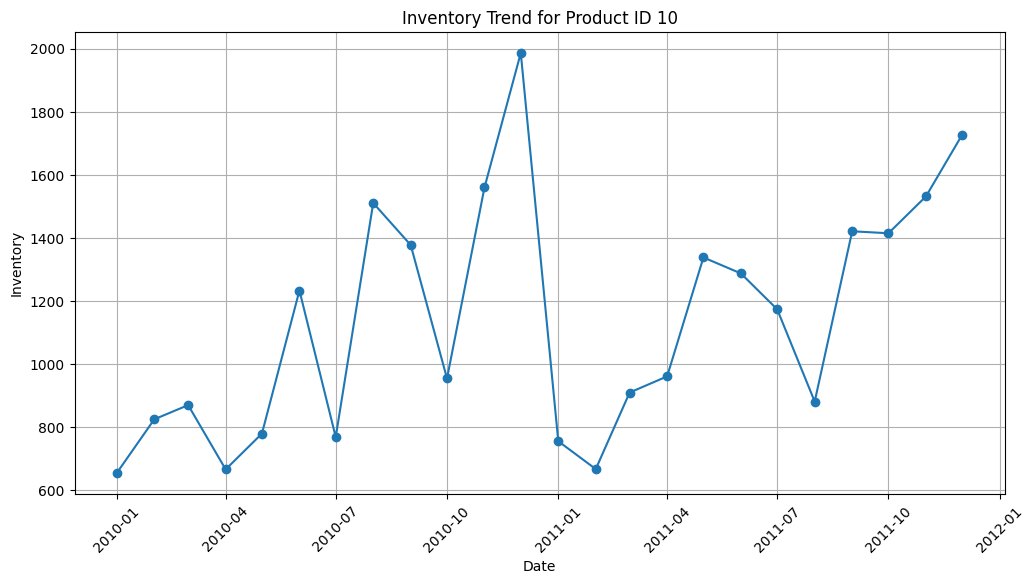

In [22]:
# Plot the inventory trend for the selected product
plt.figure(figsize=(12, 6))
plt.plot(product_inventory_data['DateTableau'], product_inventory_data['Inventory'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.title(f'Inventory Trend for Product ID {product_id_to_visualize}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### List out the lowest mean inventory product and see the trend

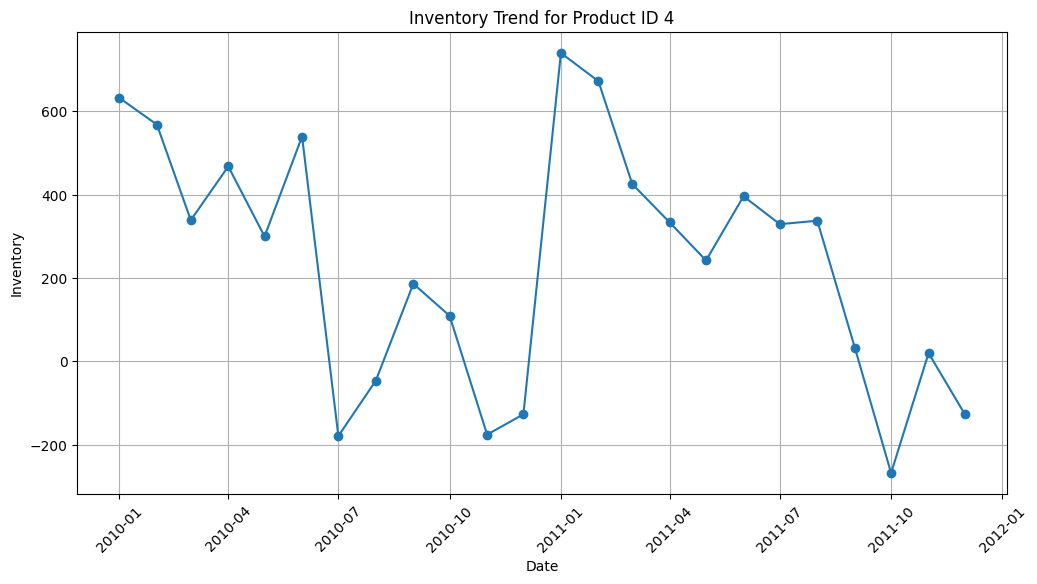

In [23]:
# Visualize the inventory trend for a specific product (you can choose one from the high or low inventory products)
product_id_to_visualize = low_inventory_products["ProductId"].iloc[0]
product_inventory_data  = inventory_trend[inventory_trend['ProductId'] == product_id_to_visualize]

# Plot the inventory trend for the selected product
plt.figure(figsize=(12, 6))
plt.plot(product_inventory_data['DateTableau'], product_inventory_data['Inventory'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.title(f'Inventory Trend for Product ID {product_id_to_visualize}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Budget vs. Actual Analysis:

### Calculate and visualize the variance between budgeted and actual sales, profit, and margin.
### Identify products where actual performance significantly deviates from the budget.

In [24]:
# Calculate the variances for sales, profit, and margin
coffee_merged['Sales_Variance'] = coffee_merged['Sales'] - coffee_merged['Budget.Sales']
coffee_merged['Profit_Variance'] = coffee_merged['Profit'] - coffee_merged['Budget.Profit']
coffee_merged['Margin_Variance'] = coffee_merged['Margin'] - coffee_merged['Budget.Margin']

# Define a threshold for significant deviation
threshold = 10  # You can adjust this threshold based on your data

# Identify products where actual performance significantly deviates from the budget
significant_deviation_products = coffee_merged[
    (abs(coffee_merged['Sales_Variance']) > threshold) |
    (abs(coffee_merged['Profit_Variance']) > threshold) |
    (abs(coffee_merged['Margin_Variance']) > threshold)
]

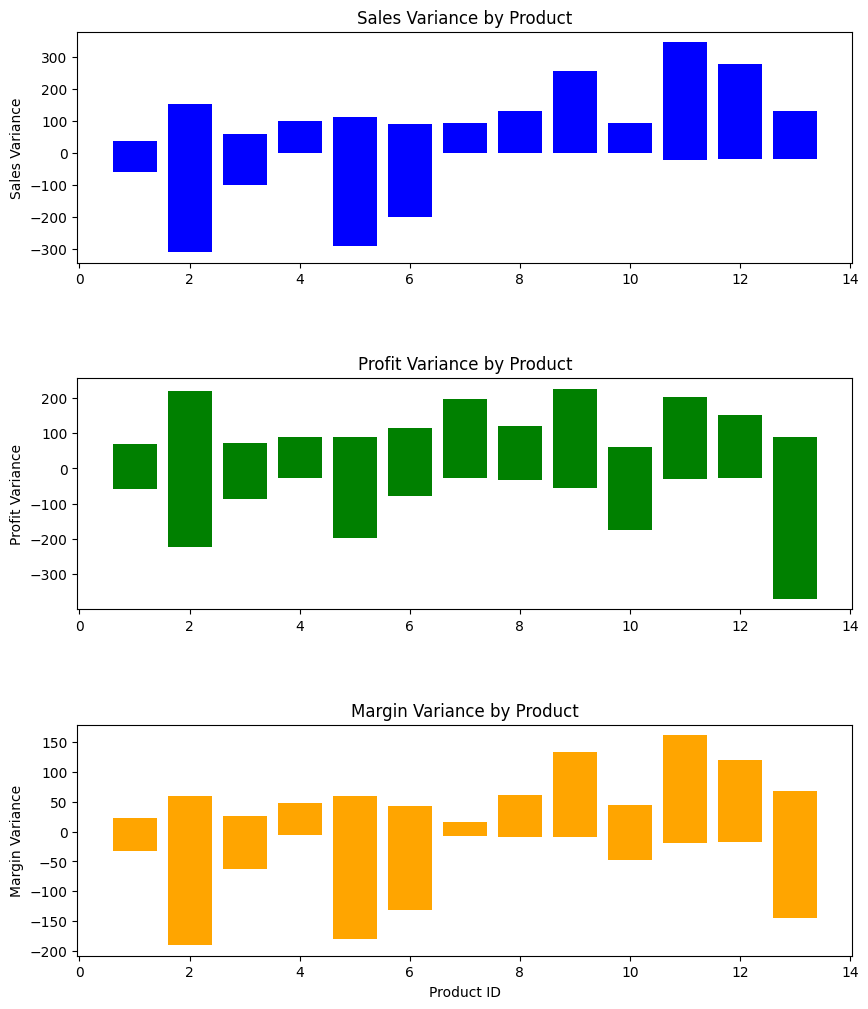

In [25]:
# Create three subplots for sales, profit, and margin variances
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.5)

# Sales Variance subplot
axes[0].bar(coffee_merged['ProductId'], coffee_merged['Sales_Variance'], color='blue', label='Sales Variance')
axes[0].set_ylabel('Sales Variance')
axes[0].set_title('Sales Variance by Product')

# Profit Variance subplot
axes[1].bar(coffee_merged['ProductId'], coffee_merged['Profit_Variance'], color='green', label='Profit Variance')
axes[1].set_ylabel('Profit Variance')
axes[1].set_title('Profit Variance by Product')

# Margin Variance subplot
axes[2].bar(coffee_merged['ProductId'], coffee_merged['Margin_Variance'], color='orange', label='Margin Variance')
axes[2].set_ylabel('Margin Variance')
axes[2].set_title('Margin Variance by Product')

plt.xlabel('Product ID')
plt.show()

### Marketing Impact:

### Analyze the correlation between marketing expenses and sales/profit for different products.
### Determine which products show the strongest correlation.

In [26]:
# Calculate the correlation matrix between marketing expenses, sales, and profit for different products
correlation_matrix = coffee_merged.groupby('ProductId')[['Marketing', 'Sales', 'Profit']].corr().unstack()['Marketing']

# Get the products with the strongest correlation between marketing expenses and sales/profit
strongest_correlation_product_sales = correlation_matrix['Sales'].idxmax()
strongest_correlation_product_profit = correlation_matrix['Profit'].idxmax()

In [27]:
# Print the product with the strongest correlation
print("Product with the Strongest Correlation Between Marketing Expenses and Sales:", strongest_correlation_product_sales)
print("Product with the Strongest Correlation Between Marketing Expenses and Profit:", strongest_correlation_product_profit)

Product with the Strongest Correlation Between Marketing Expenses and Sales: 6
Product with the Strongest Correlation Between Marketing Expenses and Profit: 6


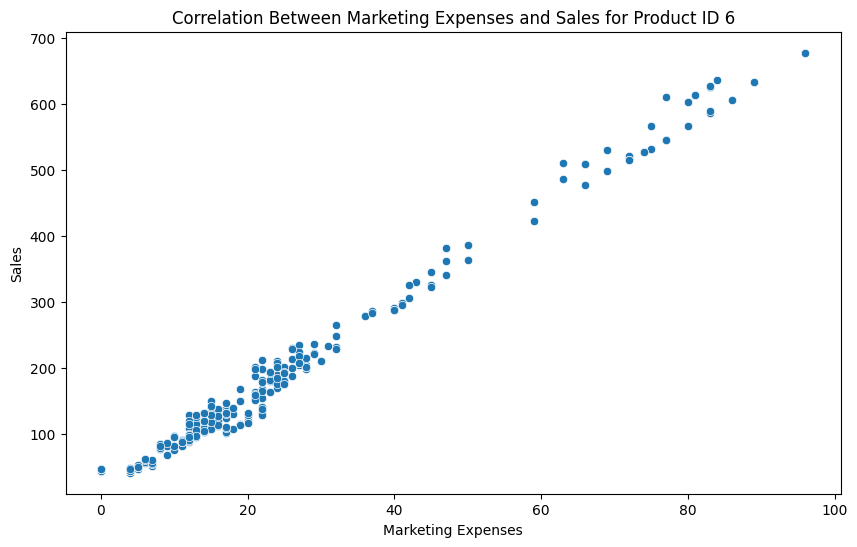

In [28]:
# Visualize the correlation between marketing expenses and sales for the product with the strongest correlation (Sales)
product_data_sales = coffee_merged[coffee_merged['ProductId'] == strongest_correlation_product_sales]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_data_sales, x='Marketing', y='Sales')
plt.xlabel('Marketing Expenses')
plt.ylabel('Sales')
plt.title(f'Correlation Between Marketing Expenses and Sales for Product ID {strongest_correlation_product_sales}')
plt.show()